<a href="https://colab.research.google.com/github/capricode-ui/AIML-Projects/blob/main/RegressionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
data=pd.read_csv('Data.csv')
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)



(6410, 4)


# New Section

In [19]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

y_predtrain=linreg.predict(X_train)
y_predtrain.shape

y_predtest=linreg.predict(X_test)




In [20]:
#r2 score of LinearRegression
from sklearn.metrics import r2_score

r0=r2_score(y_test,y_predtest)


In [22]:
from sklearn.preprocessing import PolynomialFeatures
polyreg=PolynomialFeatures(degree=6)
X_poly_train=polyreg.fit_transform(X_train)
linreg2=LinearRegression()
linreg2.fit(X_poly_train,y_train)
X_poly_test=polyreg.fit_transform(X_test)
y_pred=linreg2.predict(X_poly_test)
y_pred
#r2 score of PolynomialRegression
r1=r2_score(y_test,y_pred)
a=np.array([])
a = np.append(a,r2_score(y_test,y_pred) )



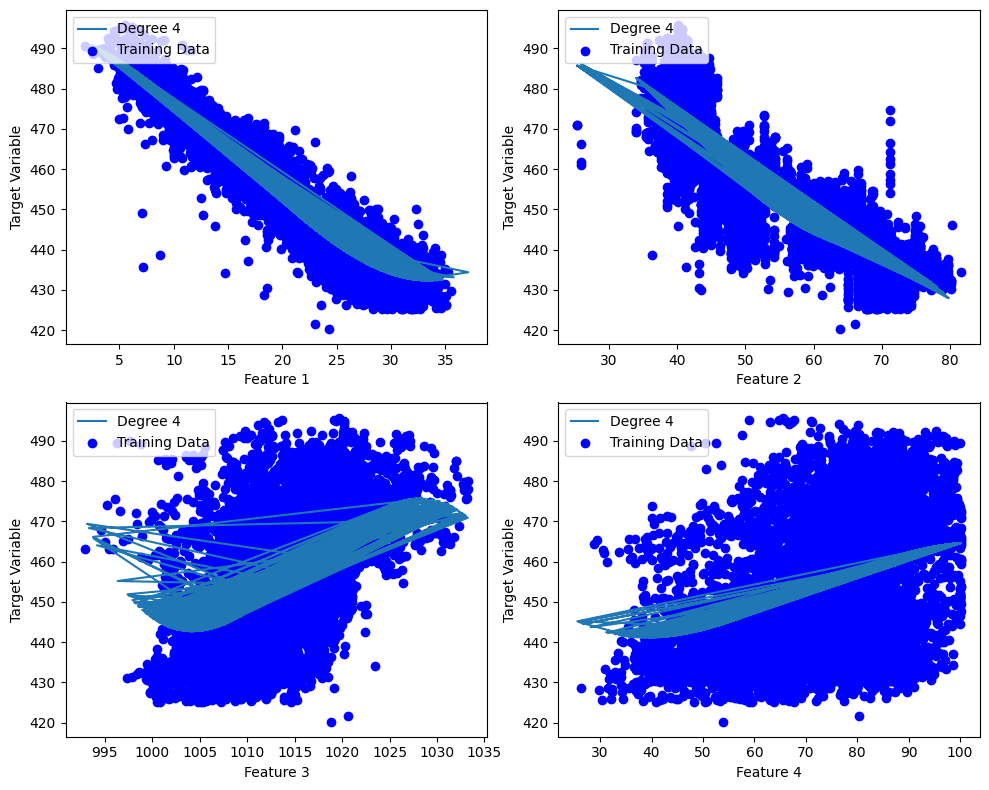

In [10]:
degrees = [4]  #

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over each feature
for i, ax in enumerate(axs.flatten()):
    feature_index = i  # Assuming each subplot corresponds to one feature
    feature_train = X_train[:, feature_index]
    feature_test = X_test[:, feature_index]

    # Fit polynomial regression for the current feature
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(feature_train.reshape(-1, 1))
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly, y_train)

        # Predict on the test data
        X_test_poly = poly_features.transform(feature_test.reshape(-1, 1))
        y_pred = lin_reg.predict(X_test_poly)

        # Plot the regression line
        ax.plot(feature_test, y_pred, label=f'Degree {degree}')

    ax.scatter(feature_train, y_train, color='blue', label='Training Data')
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('Target Variable')
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

<Axes: >

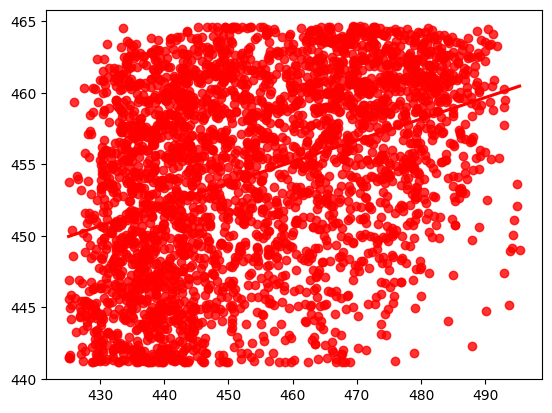

In [11]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, color="r")


In [12]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
y_pred
r3=r2_score(y_test,y_pred)



In [13]:
!pip install scikit-learn

In [15]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X_scaled=sc_X.fit_transform(X_train)
X_scaled_test=sc_X.transform(X_test)

y_scaled=sc_y.fit_transform(y_train.reshape(-1,1))
svr.fit(X_scaled,y_scaled.reshape(len(y_scaled,)))
y_pred=sc_y.inverse_transform(svr.predict(X_scaled_test).reshape(-1,1))
y_pred=y_pred.reshape(len(y_pred),)
r2=r2_score(y_test,y_pred)


#r2_score(y_train,y_pred)

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
r4=r2_score(y_test,y_pred)
r4

0.9569763124379501

In [17]:
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score

metrics = [explained_variance_score, max_error, mean_absolute_error, mean_squared_error,
           mean_squared_log_error, median_absolute_error, r2_score]

labels = ['Explained Variance Score', 'Max Error', 'Mean Absolute Error',
          'Mean Squared Error', 'Mean Squared Log Error', 'Median Absolute Error',
          'R2 Score']


a = np.array([])

for metric, label in zip(metrics, labels):
    score = metric(y_test, y_pred)
    a = np.append(a, score)

print(a)



[9.57012218e-01 4.25850000e+01 2.56017036e+00 1.25524977e+01
 6.03577727e-05 1.97650000e+00 9.56976312e-01]


Text(0.5, 1.0, 'R2_score')

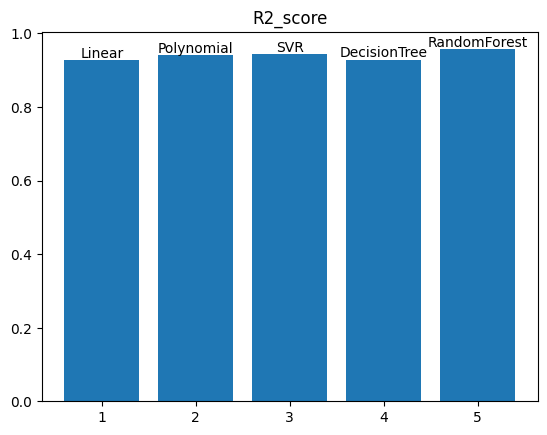

In [23]:
a = np.array([1, 2, 3, 4,5])
b=np.array([r0,r1,r2,r3,r4])
graph=plt.bar(a,b)
plt.bar_label(graph,labels=('Linear','Polynomial','SVR','DecisionTree','RandomForest'))
plt.title('R2_score')